In [2]:
import os
import pandas as pd

folder_path = r'Data'

folder_data = os.listdir(folder_path)

try:
    df = pd.concat([pd.read_excel(folder_path+'/'+file, engine='openpyxl') for file in folder_data if file.endswith('.xlsm') or file.endswith('.xlsx')])
    mask = df['Jobcode'].str.startswith('26')
    filtered_df = df[mask].copy()
    
    filtered_df = filtered_df.rename(columns = {})
    filtered_df = filtered_df['Datum', 'Weeknr', 'Naam', 'DIA', 'Werkgever', 'Werklocatie', 'Kostelement SITE', 'Kostelement KLANT', 'jobcode numeriek', 'Jobcode','uren']
    filtered_df['Datum'] = pd.to_datetime(filtered_df['Datum']).dt.strftime(format='%d/%m/%Y')

    filtered_df.to_excel('guess.xlsx',index=False)
except Exception as e:
    print(f'Exception occure: {e}')
finally:
    print(f'Data was filtered')

Exception occure: ('Datum', 'Weeknr', 'Naam', 'DIA', 'Werkgever', 'Werklocatie', 'Kostelement SITE', 'Kostelement KLANT', 'jobcode numeriek', 'Jobcode', 'uren')
Data was filtered


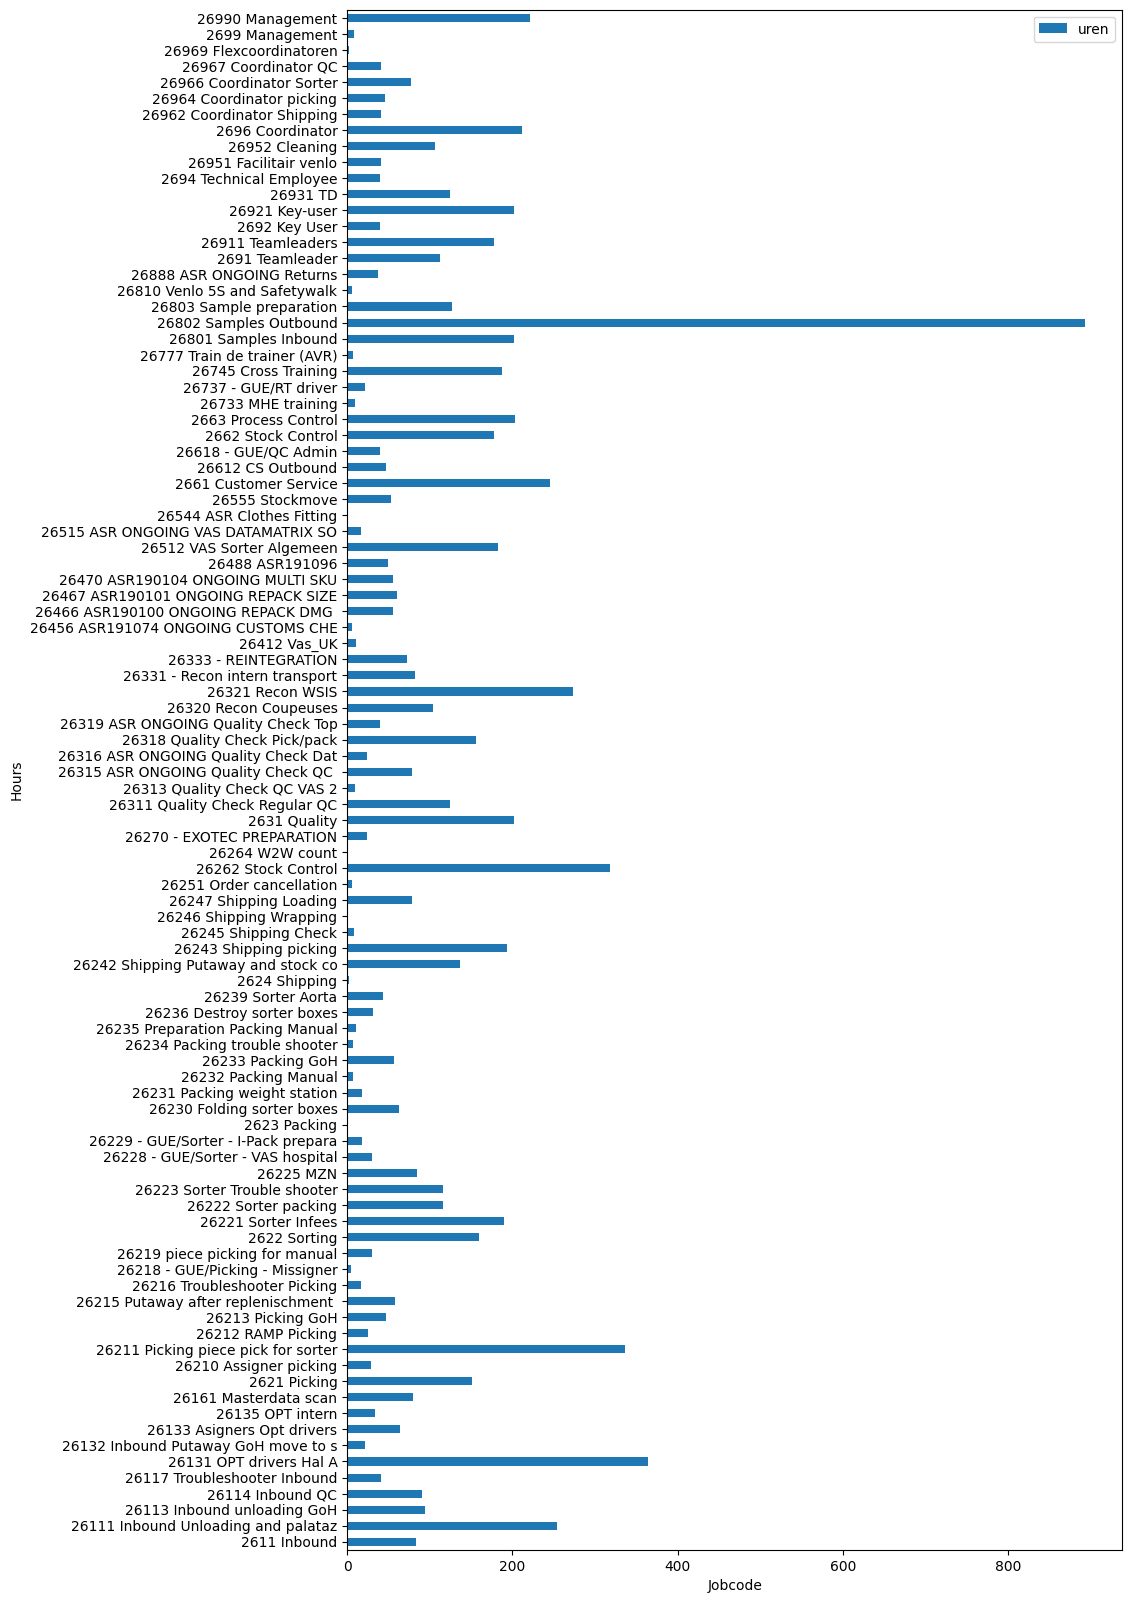

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os

path = 'Data'
folder = os.listdir(path)
df = pd.concat([pd.read_excel(path+'/'+file) for file in folder])

df.head()
mask = df['Jobcode'].str.startswith('26')
df = df[mask]
agg_df = df.groupby('Jobcode')['uren'].sum().reset_index()

agg_df.plot(x='Jobcode', y='uren', kind = 'barh', figsize=(10,20))
plt.xlabel('Jobcode')
plt.ylabel('Hours')

plt.show()